# Import

In [30]:
import numpy as np
from LinReg import LinReg
import configparser
from Ga import Ga
import matplotlib.pyplot as plt

# Useful function

In [31]:
def bitstring2number(bitstring):
    l = bitstring.dot(2**np.arange(bitstring.size)[::-1])
    return l*2**(7-len(bitstring))

In [32]:
def unit_test_bitstring2number():
    print(bitstring2number(np.array([1,0,1])) == 5*2**(7-3))

In [33]:
unit_test_bitstring2number()

True


In [34]:
def fitness_for_sinus(bitstring):
    x = bitstring2number(bitstring)
    return np.sin(x)

In [35]:
def unit_test_fitness_for_sinus():
    x = bitstring2number(np.array([1,0,1]))
    print(np.sin(x) == np.sin(5*2**(7-3)))

In [36]:
unit_test_fitness_for_sinus()

True


# e) SGA

In [37]:
config = configparser.ConfigParser()
config.read('config.ini')

sga_config = config['SGA_SINUS']

number_of_individuals = int(sga_config['number_of_individuals'])
number_of_cycle = int(sga_config['number_of_cycle'])
bitstring_lentgh = int(sga_config['bitstring_lentgh'])

crossover_type = sga_config['crossover_type']
crossover_rate = sga_config['crossover_rate']
mutation_type = sga_config['mutation_type']
mutation_rate = sga_config['mutation_rate']
selection_type = sga_config['selection_type']
fitness_fonction = sga_config['fitness_fonction']

In [38]:
sga =Ga(crossover_type=crossover_type,crossover_rate =crossover_rate, mutation_type=mutation_type,mutate_rate=mutation_rate,selection_type=selection_type,fitness_fonction=fitness_fonction)

sga_pops, sga_entropy= sga.run(number_of_individuals=number_of_individuals, number_of_cycle=number_of_cycle
                    ,bitstring_length=bitstring_lentgh)

In [39]:
sga_pops

[array([[0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0],
        [0

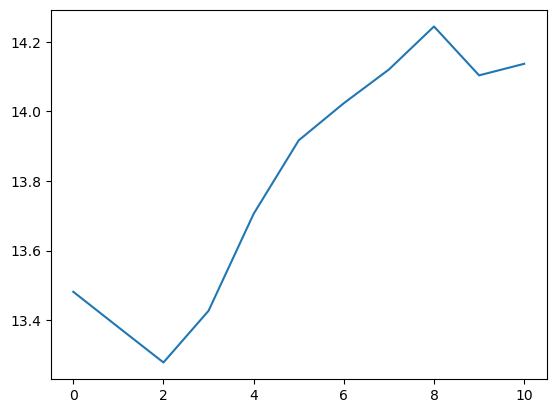

In [40]:
plt.plot(sga_entropy)
plt.show()

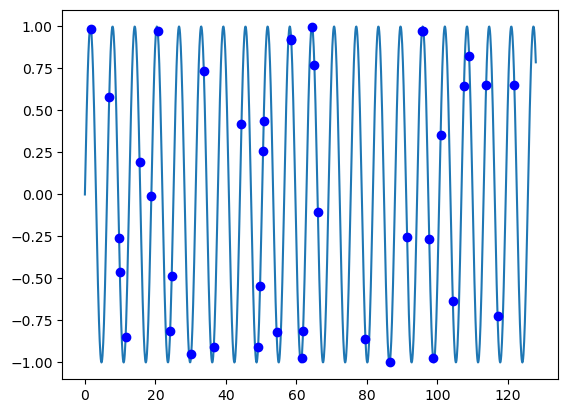

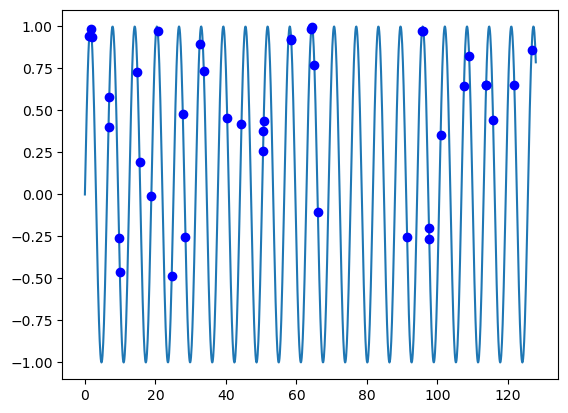

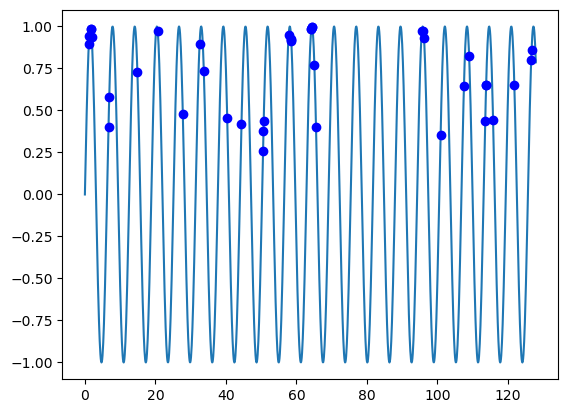

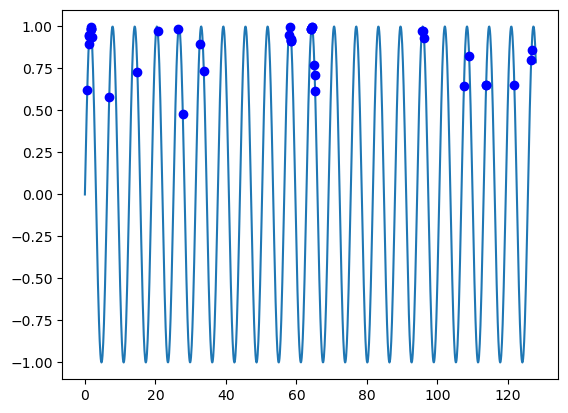

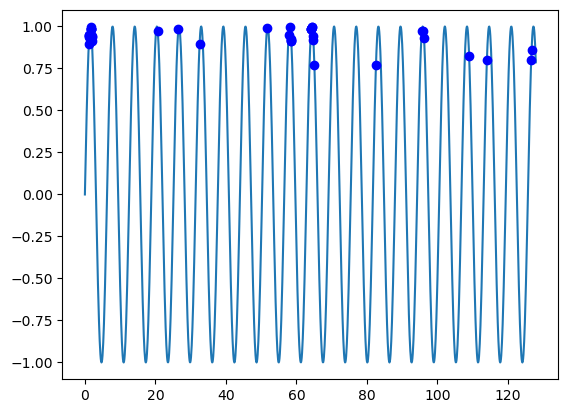

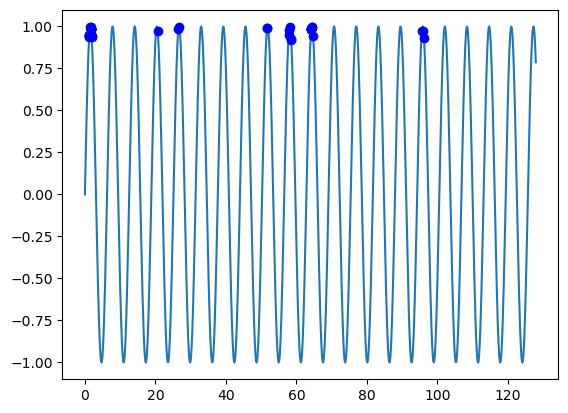

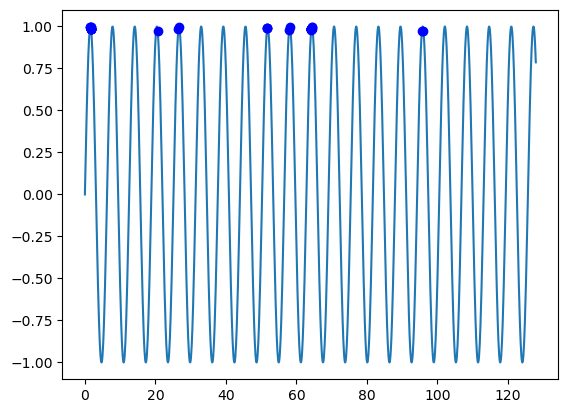

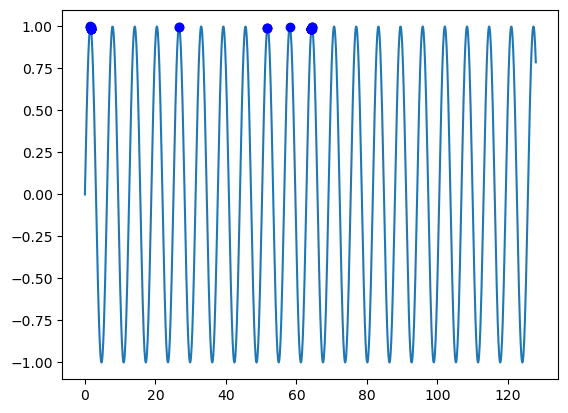

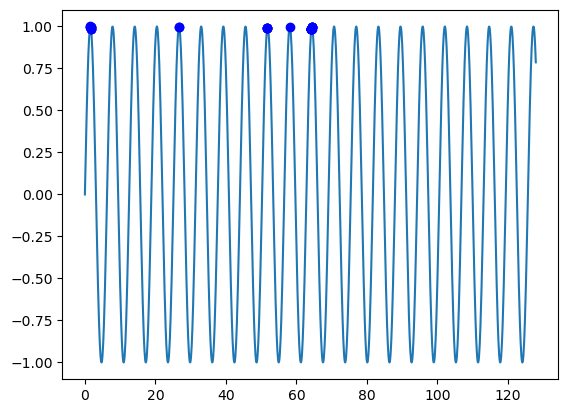

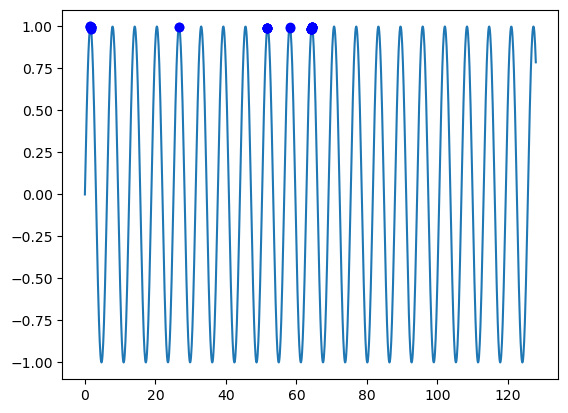

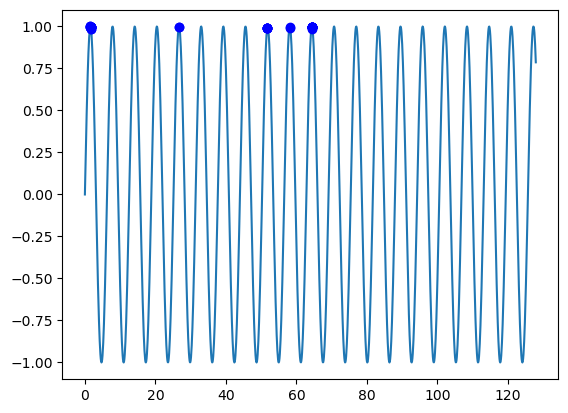

In [41]:
for i in range(len(sga_pops)):
    sga_pop = sga_pops[i]
    x_sga_pop = []
    y_sga_pop = []
    for j in range(len(sga_pop)):
        x_sga_pop.append(bitstring2number(sga_pop[j]))
        y_sga_pop.append(fitness_for_sinus(sga_pop[j]))

    x = np.arange(0,128,0.1)
    y = np.sin(x)

    plt.plot(x,y)
    plt.plot(x_sga_pop,y_sga_pop,'bo')
    plt.show()

# f) Niching

In [42]:
sga =Ga(crossover_type=crossover_type,mutation_type=mutation_type,crossover_rate =crossover_rate,mutate_rate=mutation_rate,selection_type=selection_type,fitness_fonction=fitness_fonction,interval='5 10',
        penalty_rate='0.1')

sga_pops, sga_entropy= sga.run(number_of_individuals=number_of_individuals, number_of_cycle=number_of_cycle
                    ,bitstring_length=bitstring_lentgh)

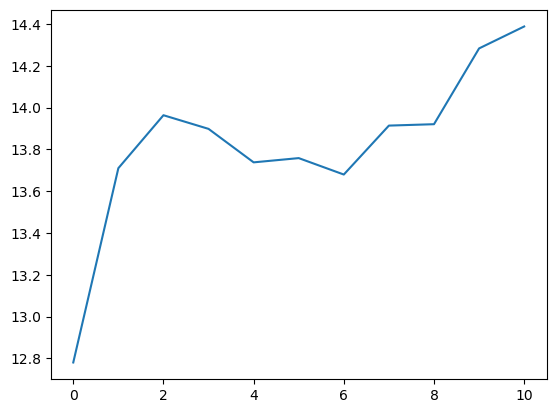

In [43]:
plt.plot(sga_entropy)
plt.show()

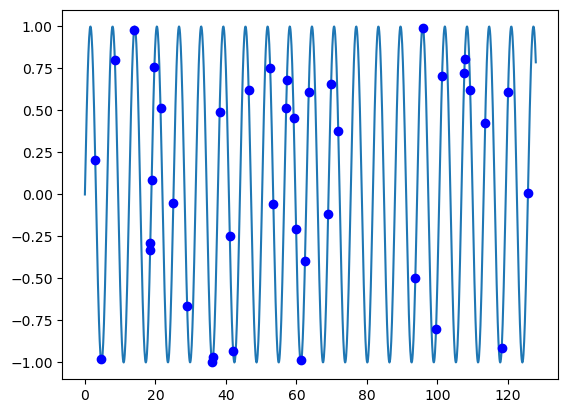

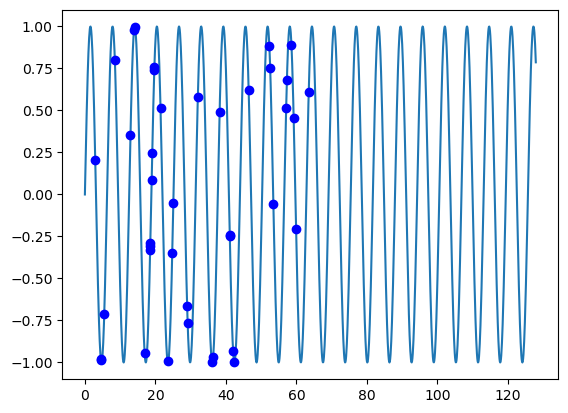

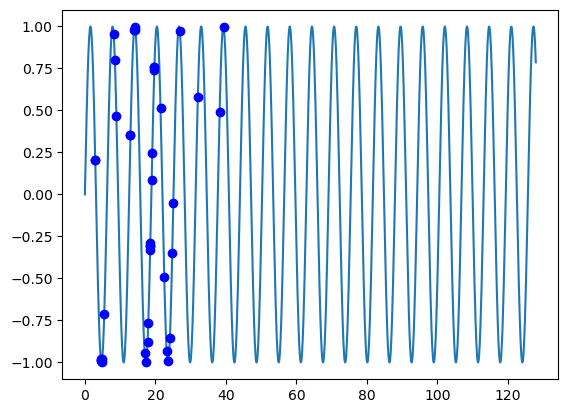

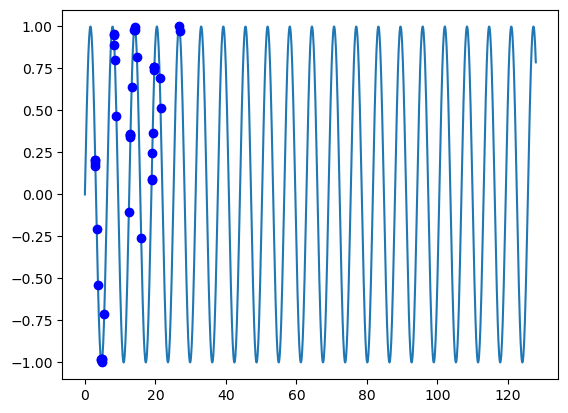

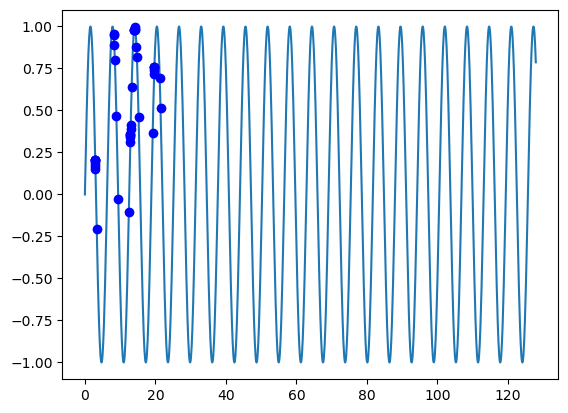

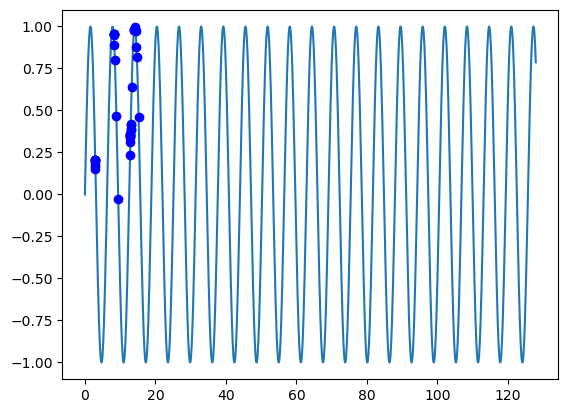

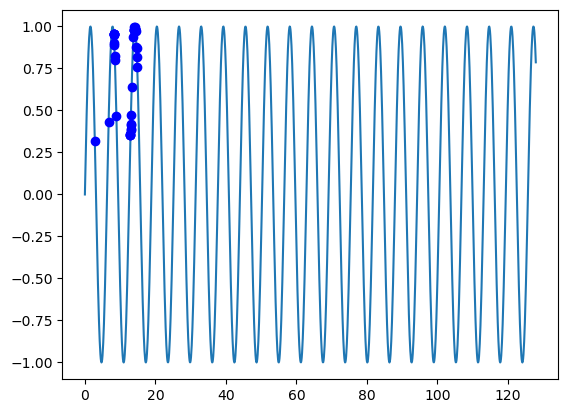

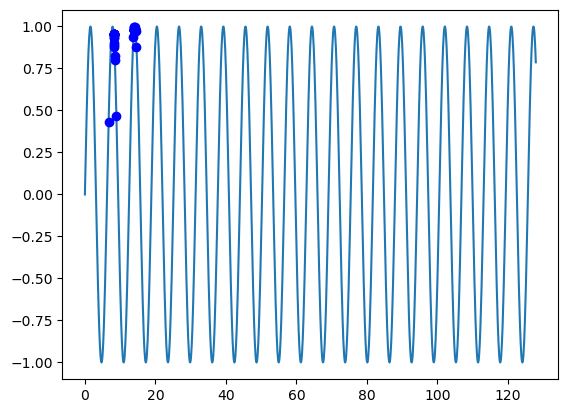

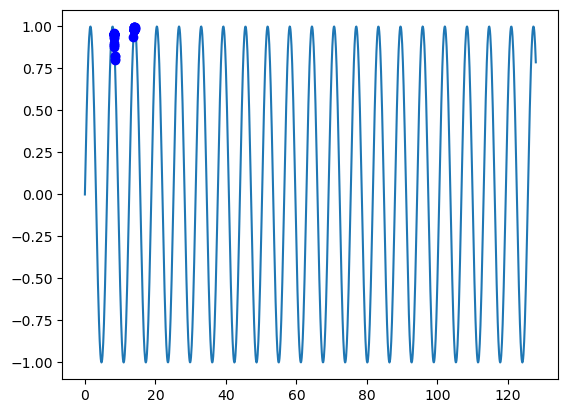

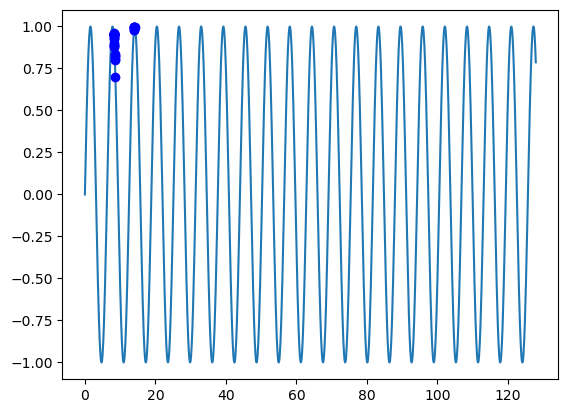

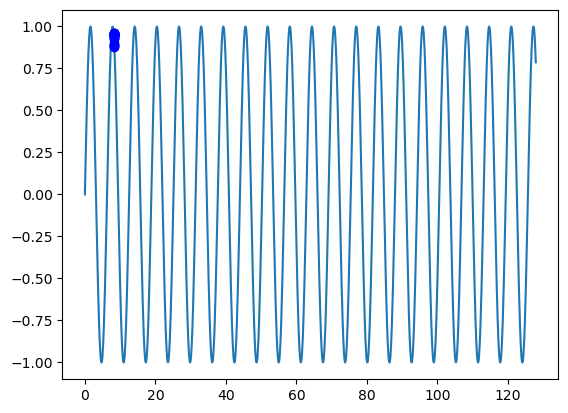

In [44]:
for i in range(len(sga_pops)):
    sga_pop = sga_pops[i]
    x_sga_pop = []
    y_sga_pop = []
    for j in range(len(sga_pop)):
        x_sga_pop.append(bitstring2number(sga_pop[j]))
        y_sga_pop.append(fitness_for_sinus(sga_pop[j]))

    x = np.arange(0,128,0.1)
    y = np.sin(x)

    plt.plot(x,y)
    plt.plot(x_sga_pop,y_sga_pop,'bo')
    plt.show()

# g) Dataset

In [45]:
dataset=np.loadtxt(open("dataset.txt", "rb"), delimiter=",")
X=dataset[:,:-1]
Y=dataset[:,-1]

lR=LinReg()

In [46]:
rng = 4

In [47]:
def rmse(bitstring):
    bitstring = np.array(bitstring)

    x_filtered=lR.get_columns(X,bitstring)
    return lR.get_fitness(x_filtered, Y,rng)

In [48]:
config = configparser.ConfigParser()
config.read('config.ini')

sga_config = config['SGA_DATASET']

number_of_individuals = int(sga_config['number_of_individuals'])
number_of_cycle = int(sga_config['number_of_cycle'])
bitstring_lentgh = int(sga_config['bitstring_lentgh'])

crossover_type = sga_config['crossover_type']
crossover_rate = sga_config['crossover_rate']
mutation_type = sga_config['mutation_type']
mutation_rate = sga_config['mutation_rate']
selection_type = sga_config['selection_type']
fitness_fonction = sga_config['fitness_fonction']

In [49]:
sga =Ga(crossover_type=crossover_type,crossover_rate=crossover_rate,mutation_type=mutation_type,mutate_rate=mutation_rate,selection_type=selection_type,fitness_fonction=fitness_fonction)

sga_pops, sga_entropy= sga.run(number_of_individuals=number_of_individuals, number_of_cycle=number_of_cycle
                    ,bitstring_length=bitstring_lentgh)

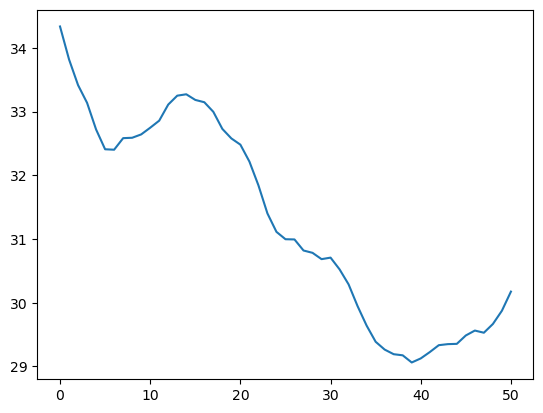

In [50]:
plt.plot(sga_entropy)
plt.show()

### The best individual found

In [51]:
sga_pops[-1][0]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

### Individual where all the labels selected fitness score

In [52]:
rmse(np.ones(101))

0.12583380410422912

### Best individual fitness score

In [54]:
rmse(sga_pops[-1][0])

0.1185885431143697

# h) Crowding

In [55]:
config = configparser.ConfigParser()
config.read('config.ini')

crowding_config = config['CROWDING']

number_of_individuals = int(crowding_config['number_of_individuals'])
number_of_cycle = int(crowding_config['number_of_cycle'])
bitstring_lentgh = int(crowding_config['bitstring_lentgh'])

crossover_type = crowding_config['crossover_type']
crossover_rate = crowding_config['crossover_rate']
mutation_type = crowding_config['mutation_type']
mutation_rate = crowding_config['mutation_rate']
selection_type = crowding_config['selection_type']
fitness_fonction = crowding_config['fitness_fonction']

In [56]:
crowding =Ga(crowding_option=True,crossover_type=crossover_type,crossover_rate=crossover_rate,mutation_type=mutation_type,mutate_rate=mutation_rate,selection_type=selection_type,fitness_fonction=fitness_fonction)

crowding_pops, crowding_entropy= sga.run(number_of_individuals=number_of_individuals, number_of_cycle=number_of_cycle
                    ,bitstring_length=bitstring_lentgh)

### Crowding entropy

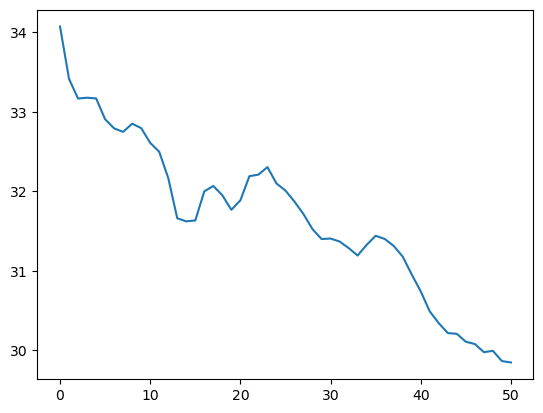

In [57]:
plt.plot(crowding_entropy)
plt.show()

### The best individual found

In [58]:
crowding_pops[-1][0]

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

### Individual where all the labels selected fitness score

In [59]:
rmse(np.ones(101))

0.12583380410422912

### Best individual fitness score

In [64]:
rmse(crowding_pops[-1][0])

0.11849429635270295

### Entropy of sga in yellow and crowding in green

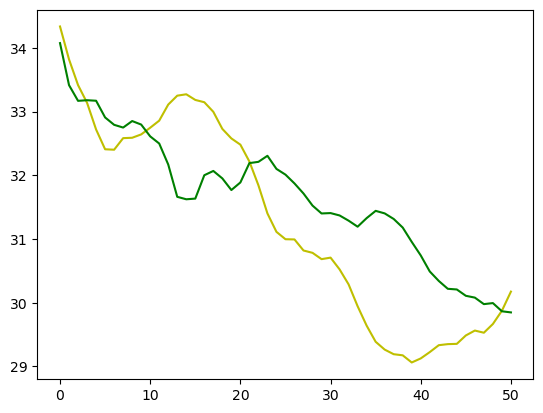

In [61]:
plt.plot(sga_entropy,'y')
plt.plot(crowding_entropy,'g')
plt.show()